In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
def showBN(model, save=False):
    '''传入BayesianModel对象，调用graphviz绘制结构图，jupyter中可直接显示'''
    from graphviz import Digraph
    node_attr = dict(
     style='filled',
     shape='box',
     align='left',
     fontsize='12',
     ranksep='0.1',
     height='0.2'
    )
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()
    edges=model.edges()
    for a,b in edges:
        dot.edge(a,b)
    if save:
        dot.view(cleanup=True)
    return dot

In [4]:
!pip install pgmpy
!pip install pgmpy --upgrade

     |████████████████████████████████| 337kB 6.0MB/s 
Requirement already up-to-date: pgmpy in /usr/local/lib/python3.7/dist-packages (0.1.14)


In [5]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator

#load data and separate into train and test
data_path = '/content/gdrive/MyDrive/Bayesian_Network_Adult_Income/adult_processed_planA.csv'
df = pd.read_csv(data_path)

df = df.reindex(np.random.permutation(df.index))
df = df.drop(columns=["Unnamed: 0"],axis=1)
display(df.head())
train = df[:-6000]
test = df[-6000:]
#display(train.describe(include=["object"]).T)
#display(test.describe(include=["object"]).T)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


FileNotFoundError: ignored

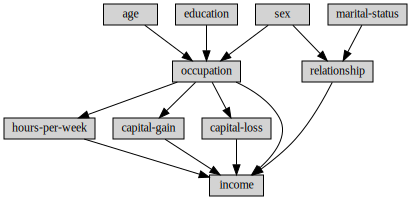

In [ ]:
#create model 
#design by myself

model = BayesianModel([('sex', 'occupation'), ('age', 'occupation'),('education','occupation'),
                       ('occupation','hours-per-week'),('occupation','capital-gain'),('occupation','capital-loss'),
                       ('hours-per-week','income'),('occupation','income'),('capital-gain','income'),('capital-loss','income'),
                       ('sex', 'relationship'),('marital-status','relationship'),('relationship','income')])


'''
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BDeuScore, K2Score, BicScore
hc = HillClimbSearch(train, scoring_method=BicScore(train))
best_model = hc.estimate()
model = BayesianModel(best_model.edges())
'''
showBN(model)

In [ ]:
#train CPT

model.cpds = []
model.fit(data=train, 
          estimator=BayesianEstimator,
          prior_type="BDeu",
          equivalent_sample_size=10,
          complete_samples_only=False)

print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')
#inference
#evaluation(precision and recall)

/usr/local/lib/python3.6/dist-packages/pgmpy/estimators/BayesianEstimator.py:155: UserWarning: pseudo count specified with bdeu prior. It will be ignored, use dirichlet prior for specifying pseudo_counts
  f"pseudo count specified with {prior_type} prior. It will be ignored, use dirichlet prior for specifying pseudo_counts"
/usr/local/lib/python3.6/dist-packages/pgmpy/estimators/BayesianEstimator.py:155: UserWarning: pseudo count specified with bdeu prior. It will be ignored, use dirichlet prior for specifying pseudo_counts
  f"pseudo count specified with {prior_type} prior. It will be ignored, use dirichlet prior for specifying pseudo_counts"
/usr/local/lib/python3.6/dist-packages/pgmpy/estimators/BayesianEstimator.py:155: UserWarning: pseudo count specified with bdeu prior. It will be ignored, use dirichlet prior for specifying pseudo_counts
  f"pseudo count specified with {prior_type} prior. It will be ignored, use dirichlet prior for specifying pseudo_counts"
/usr/local/lib/python3

Check model: True

CPT of sex:
+-------------+----------+
| sex(Female) | 0.329871 |
+-------------+----------+
| sex(Male)   | 0.670129 |
+-------------+----------+ 

CPT of occupation:
+-------------------------------+-----------------------+------------------------+-----------------------+-----------------------+------------------------+-----------------------+-----------------------+------------------------+-----------------------+-----------------------+------------------------+-----------------------+------------------------+----------------------+------------------------+-----------------------+-----------------------+------------------------+------------------------+------------------------+-----------------------+----------------------+-----------------------+-----------------------+------------------------+------------------------+----------------------+-----------------------+------------------------+------------------------+-------------------------+------------------------

In [1]:
# 0.8160127253446448(Mydesign)
# 0.8329798515376459(Automatic)
test = test.dropna()
test.sort_index(inplace=True)
predict_data=test.drop(columns=['income'],axis=1)
display(predict_data.head())
y_pred = model.predict(predict_data)
print((y_pred['income'].to_numpy()==test['income'].to_numpy()).sum()/len(test))


NameError: ignored